In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os.path

In [324]:
df = pd.read_excel("data/DataPanelWHR2021C2.xlsx")
df

Country name    year  Life Ladder  Log GDP per capita  Social support  \
0         Finland  2020.0     7.889350           10.750446        0.961621   
1         Iceland  2020.0     7.575490           10.824201        0.983286   
2         Denmark  2020.0     7.514631           10.909995        0.947371   
3     Switzerland  2020.0     7.508435           11.080893        0.946316   
4     Netherlands  2020.0     7.504448           10.900500        0.943956   
...           ...     ...          ...                 ...             ...   
1944     Pakistan  2005.0     5.224658            8.217931        0.590946   
1945      Hungary  2005.0     5.193933           10.107747        0.929628   
1946        Egypt  2005.0     5.167754            9.035634        0.847842   
1947      Romania  2005.0     5.048648            9.724312        0.837685   
1948       Turkey  2005.0     4.718734            9.809252        0.819936   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                            72.099998                      0.962424   
1                            73.000000                      0.948627   
2                            73.000000                      0.937932   
3                            74.699997                      0.917343   
4                            72.500000                      0.934523   
...                                ...                           ...   
1944                         54.200001                      0.629996   
1945                         64.599998                      0.696874   
1946                         59.700001                      0.817362   
1947                         64.000000                      0.800121   
1948                         62.599998                      0.623115   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0      -0.115532                   0.163636         0.744292         0.192898  
1       0.160274                   0.644064         0.863018         0.171795  
2       0.052293                   0.213842         0.817664         0.227102  
3      -0.063502                   0.280367         0.768705         0.193229  
4       0.151298                   0.280605         0.783991         0.246511  
...          ...                        ...              ...              ...  
1944         NaN                   0.844436              NaN         0.237266  
1945         NaN                   0.902811         0.675444         0.290327  
1946         NaN                        NaN         0.734863         0.345555  
1947         NaN                   0.956885         0.642016         0.345687  
1948         NaN                   0.876999         0.556581              NaN  

[1949 rows x 11 columns]

In [325]:
print('what are the types of variables?')
print(df.dtypes)

what are the types of variables?
Country name                         object
year                                float64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object


In [326]:
# how many observations have at least one variable missing
print('how many observations have at least one variable missing?')
print((df.isna().sum(axis=1) > 0).sum())

# how many missing observations per variable
print('')
print("how many missing observations per variable?")
print(df.isna().sum(axis=0))

how many observations have at least one variable missing?
241

how many missing observations per variable?
Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64


In [327]:
print('show observations with missing variables and order by number of missing variables')

df['missing'] = df.isna().sum(axis=1) # add column with count of missing vars

df[df.missing > 0].sort_values(by=['missing'], ascending=False)

show observations with missing variables and order by number of missing variables


Country name    year  Life Ladder  Log GDP per capita  \
702                      Qatar  2015.0     6.374529           11.485615   
465                    Vietnam  2017.0     5.175279            8.875670   
839       United Arab Emirates  2014.0     6.539855           11.040978   
850                     Kuwait  2014.0     6.180139           10.944600   
851                    Bahrain  2014.0     6.165134           10.783467   
...                        ...     ...          ...                 ...   
306                 Tajikistan  2018.0     5.497469            8.081698   
270               Saudi Arabia  2018.0     6.356393           10.770519   
1118                    Brazil  2012.0     6.660004            9.646898   
1120                     Qatar  2012.0     6.611299           11.523082   
991   Taiwan Province of China  2013.0     6.340344           10.750063   

      Social support  Healthy life expectancy at birth  \
702              NaN                         68.300003   
465              NaN                         67.699997   
839              NaN                         66.480003   
850              NaN                         65.800003   
851              NaN                         67.419998   
...              ...                               ...   
306         0.875243                         64.099998   
270         0.867848                         66.300003   
1118        0.890314                         65.019997   
1120        0.838132                         67.339996   
991         0.816993                               NaN   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
702                            NaN         NaN                        NaN   
465                            NaN         NaN                        NaN   
839                            NaN         NaN                        NaN   
850                            NaN         NaN                        NaN   
851                            NaN         NaN                        NaN   
...                            ...         ...                        ...   
306                            NaN   -0.064819                   0.577946   
270                       0.854922   -0.192266                        NaN   
1118                      0.848606         NaN                   0.622543   
1120                      0.924334    0.161530                        NaN   
991                       0.690071    0.001518                   0.841232   

      Positive affect  Negative affect  missing  
702               NaN              NaN        6  
465               NaN              NaN        6  
839               NaN              NaN        6  
850               NaN              NaN        6  
851               NaN              NaN        6  
...               ...              ...      ...  
306          0.694633         0.219794        1  
270          0.764405         0.288380        1  
1118         0.754625         0.349759        1  
1120         0.765899         0.322181        1  
991          0.846232         0.124445        1  

[241 rows x 12 columns]

In [328]:
print('does the number of missing variables correlate with life score?')
df[['Life Ladder', 'missing']].corr()

does the number of missing variables correlate with life score?


Life Ladder   missing
Life Ladder     1.000000  0.029336
missing         0.029336  1.000000

# deal with NA

Drop NAs.

In [329]:
df2 = df.dropna().drop("missing", axis=1)

After dropping NAs from the dataset, the `missing` variable becomes irrelevant since it's value is always 0.

# Multi year analysis

Text(0.5, 1.0, 'Correlation all years')

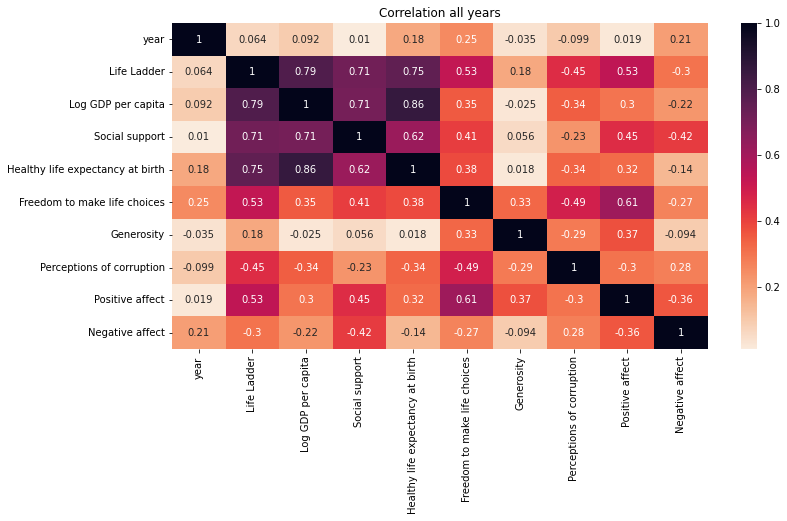

In [29]:
corr = df2.corr()
abs_corr = abs(corr)
plt.figure(figsize=(12,6))
sns.heatmap(abs_corr, cmap=sns.cm.rocket_r, annot=corr)
plt.title(f'Correlation all years')

The year has very week correlation with all variables except life expectancy at birth, freedom to make life choices and negative affect, wich have a positive correlation.

# Single year analysis

In [30]:
print('how many samples per year?')
df2.groupby(['year']).year.describe()

how many samples per year?


count    mean  std     min     25%     50%     75%     max
year                                                            
2005    1.0  2005.0  NaN  2005.0  2005.0  2005.0  2005.0  2005.0
2006   74.0  2006.0  0.0  2006.0  2006.0  2006.0  2006.0  2006.0
2007   94.0  2007.0  0.0  2007.0  2007.0  2007.0  2007.0  2007.0
2008  101.0  2008.0  0.0  2008.0  2008.0  2008.0  2008.0  2008.0
2009  106.0  2009.0  0.0  2009.0  2009.0  2009.0  2009.0  2009.0
2010  112.0  2010.0  0.0  2010.0  2010.0  2010.0  2010.0  2010.0
2011  132.0  2011.0  0.0  2011.0  2011.0  2011.0  2011.0  2011.0
2012  121.0  2012.0  0.0  2012.0  2012.0  2012.0  2012.0  2012.0
2013  124.0  2013.0  0.0  2013.0  2013.0  2013.0  2013.0  2013.0
2014  127.0  2014.0  0.0  2014.0  2014.0  2014.0  2014.0  2014.0
2015  127.0  2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0
2016  124.0  2016.0  0.0  2016.0  2016.0  2016.0  2016.0  2016.0
2017  132.0  2017.0  0.0  2017.0  2017.0  2017.0  2017.0  2017.0
2018  126.0  2018.0  0.0  2018.0  2018.0  2018.0  2018.0  2018.0
2019  126.0  2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0
2020   81.0  2020.0  0.0  2020.0  2020.0  2020.0  2020.0  2020.0

2005 was left with only 1 sample. Let's exclude any year with less that 2 samples.

In [31]:
for year in df2.year.unique():
    year_df = df2[df2.year == year]
    if year_df.shape[0] < 2:
        df2 = df2.drop(year_df.index)

In single year analysis, the `year` variable is removed since it becomes irrelevant in correleation.

In [32]:
all_corrs = {}
for y in sorted(df2.year.unique()):
    df_year =  df2[df2.year==y].drop('year', axis=1)
    year_corr = df_year.corr()
    n_samples =  df_year.shape[0]
    all_corrs[y] = (n_samples, year_corr)

In [33]:
def year_corr(year, corr, n_samples=None, cbar=True):
    abs_corr = abs(corr)
    sns.heatmap(abs_corr, cmap=sns.cm.rocket_r, annot=corr, cbar=cbar)
    if n_samples is not None:
        plt.title(f'Correlation {year}, #samples={n_samples}')
    else:
        plt.title(f'Correlation {year}')

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df2[['Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']])

scaler.transform(df2[['Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']])

df2_norm = df2

df2_norm[['Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']] = scaler.transform(df2[['Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']])

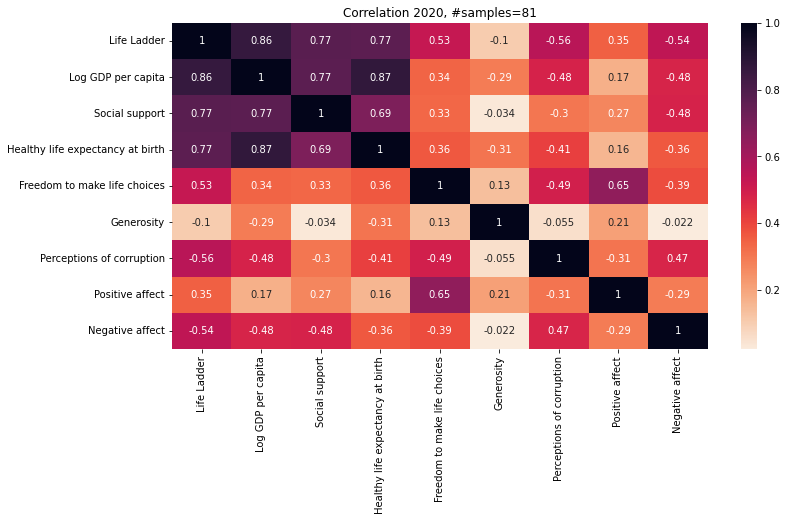

In [47]:
year = 2020
plt.figure(figsize=(12,6))
year_corr(year, all_corrs[year][1], n_samples=all_corrs[year][0])
plt.savefig(os.path.join('outputs', f'correlation_{year}.png'))

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

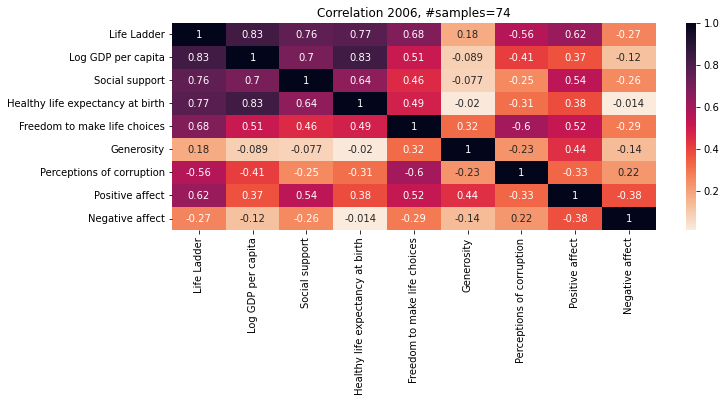

In [83]:
# save correlation of all years in files
for year in df2.year.unique():
    if year in [2005]:
        continue
    plt.clf()
    plt.figure(figsize=(12,6))
    year_corr(year, all_corrs[year][1], n_samples=all_corrs[year][0])
    plt.subplots_adjust(bottom=0.4, left=0.20)  # make more room for the x and y labels
    plt.savefig(os.path.join('outputs', f'correlation_{year}.png'))

In [ ]:
from matplotlib import animation
from IPython import display

In [49]:
fig = plt.figure(figsize=(16,12))
data = np.random.rand(10, 10)
year_1 = list(all_corrs.keys())[0]
year_corr(year_1, all_corrs[year_1][1], cbar=True)

def init():
    # clear previous heatmap
    sns.heatmap(np.zeros(all_corrs[year_1][1].shape), vmin=0.0, vmax=1.0, cbar=False)
                
                
def animate(year):
    fig.clear()  # clear figure between frames, so not to overlap
    plt.subplots_adjust(bottom=0.2, left=0.15)  # make more room for the x and y labels
    n_samples, corr = all_corrs[year]
    print(year)
    year_corr(year, corr, n_samples=n_samples, cbar=False)

anim = animation.FuncAnimation(fig, animate, frames=list(all_corrs),
                               repeat = True, interval=1500)
print("making video to file")
anim.save(os.path.join('outputs', 'corr.mp4'), dpi=50)
print("making video to html display")
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
 
# good practice to close the plt object.
plt.close()

making video to file
2006
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
making video to html display
2006
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [364]:
def normalize(d, column):
    normed = (d[column] - d[column].mean()) / d[column].std()
    return normed


def normalize_minmax(d, column):
    normalized_df=(d[column]-d[column].min())/(d[column].max()-d[column].min())
    return normalized_df


# tracking performance polar plots for the best and worst countries in the first and last years

In [362]:
polar_vars = ['Log GDP per capita',
              'Social support',
              'Healthy life expectancy at birth',
              'Freedom to make life choices',
              'Perceptions of corruption',
             ]

## first year of dataset

In [388]:
import tempfile
import cv2
import os.path

def make_polar_plot(country, year, polar_vars_arg, fig=None, store=False):
    df_y = df2[df2.year == year]
    
    # normalize with min and max in specified year
    for col in polar_vars_arg:
        df_y[col] = normalize_minmax(df_y, col)

    country_data = df_y[df_y['Country name'] == country]
    polar_data = country_data[polar_vars_arg].iloc[0]
    

    df_c = pd.DataFrame({'Col A': polar_vars_arg,
                   'Col B': list(polar_data)})

    fig = fig if fig is not None else plt.figure()
    ax = fig.add_subplot(111, projection="polar")

    # theta has 5 different angles, and the first one repeated
    theta = np.arange(len(df_c) + 1) / float(len(df_c)) * 2 * np.pi
    # values has the 5 values from 'Col B', with the first element repeated
    values = df_c['Col B'].values
    values = np.append(values, values[0])

    # draw the polygon and the mark the points for each angle/value combination
    l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
    plt.xticks(theta[:-1], df_c['Col A'], color='grey', size=12)
    ax.tick_params(pad=10) # to increase the distance of the labels to the plot
    # fill the area of the polygon with green and some transparency
    ax.fill(theta, values, 'green', alpha=0.1)

    # plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
    plt.title(f'{year} - {country} - life ladder={(country_data["Life Ladder"].values[0]):.2f}')
    #plt.figure(figsize=(15,15))
    #plt.show()
    if store:
        fn = f'radar_{year}_{country}.png'
        plt.savefig(os.path.join('outputs', fn))
    
def make_polar_plot_all_year(country, polar_vars_arg):
    country_df = df2[df2['Country name'] == country]
    for year in sorted(list(country_df.year.unique())):
        make_polar_plot(country, year, polar_vars)

        
def make_polar_video(country, polar_vars_arg, write_file=False, filename=None):
    dir_path = tempfile.mkdtemp()
    im_files = []
    country_years = sorted(list(df2[df2['Country name'] == country].year.unique()))
    
    # make and save plots of all years
    for year in country_years:
        make_polar_plot(country, year, polar_vars)
        fn = os.path.join(dir_path, f'{country}{int(year)}.jpeg')
        print(fn)
        im_files.append(fn)
        plt.savefig(fn)
        
    
    # make video from files
    # first frame
    frame = cv2.imread(im_files[0])
    w,h,l = frame.shape
    print(f'shape={(w,h,l)}')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Be sure to use lower case
    video_fn = '/home/diogoaos/Documents/iseg/IAIML/group/polar.mp4'
    video = cv2.VideoWriter(f'{country}_polar.mp4', fourcc, 0.5, (w,h))
    
    def write_n_times(f, n=5):
        video.write(f)
    
    write_n_times(frame)
    for fn in im_files[1:]:
        frame = cv2.imread(fn)
        write_n_times(frame)
    video.release()
    cv2.destroyAllWindows()


def make_polar_video_failed(country, polar_vars_arg, write_file=False, filename=None):
    
    country_years = sorted(list(df2[df2['Country name'] == country].year.unique()))
    figure = plt.figure()

    def polar_animate(year):
        #fig.clear()  # clear figure between frames, so not to overlap
        make_polar_plot(country, year, polar_vars_arg, fig=figure)

    anim = animation.FuncAnimation(fig, polar_animate, frames=country_years,
                                   repeat = True, interval=1500)
    #print("making video to file")
    #anim.save("corr.mp4", dpi=50)
    print("making video to html display")
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)

    # good practice to close the plt object.
    plt.close()

In [377]:
first_year = sorted(df2.year.unique())[0]
last_year = sorted(df2.year.unique())[-1]

def best_worst_in_year(year):
    df_y = df2[df2.year == year]
    
    # best country
    best_idx = df_y['Life Ladder'].argmax()
    best_country = df_y.iloc[best_idx]['Country name']
    
    worst_idx = df_y['Life Ladder'].argmin()
    worst_country = df_y.iloc[worst_idx]['Country name']
    
    return {'year': year, 'best': best_country, 'worst': worst_country}

first_countries = best_worst_in_year(first_year)
last_countries = best_worst_in_year(last_year)
print(first_countries, last_countries)

{'year': 2005.0, 'best': 'Canada', 'worst': 'Canada'} {'year': 2020.0, 'best': 'Finland', 'worst': 'Zimbabwe'}


In [ ]:
df2[df2['Country name'] == first_countries['worst']][[ 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']]

In [ ]:
make_polar_video('Finland', polar_vars)

/tmp/ipykernel_20194/1418786783.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y[col] = normalize_minmax(df_y, col)
/tmp/ipykernel_20194/1418786783.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y[col] = normalize_minmax(df_y, col)
/tmp/ipykernel_20194/1418786783.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

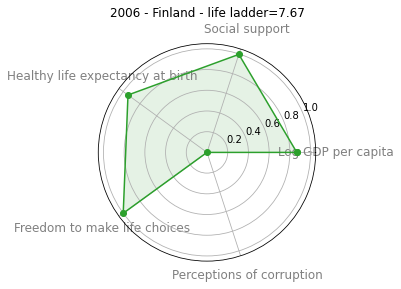

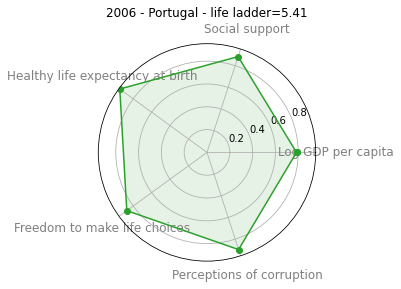

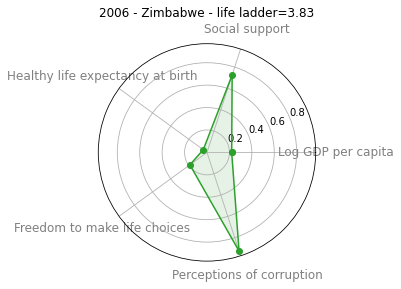

In [389]:
year = 2006
make_polar_plot('Finland',year,  polar_vars, store=True)
make_polar_plot('Portugal',year,  polar_vars, store=True)
make_polar_plot('Zimbabwe',year,  polar_vars, store=True)

/tmp/ipykernel_20194/1418786783.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y[col] = normalize_minmax(df_y, col)
/tmp/ipykernel_20194/1418786783.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y[col] = normalize_minmax(df_y, col)
/tmp/ipykernel_20194/1418786783.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

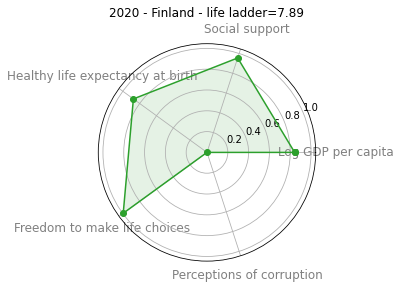

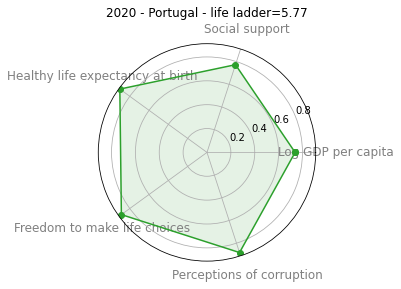

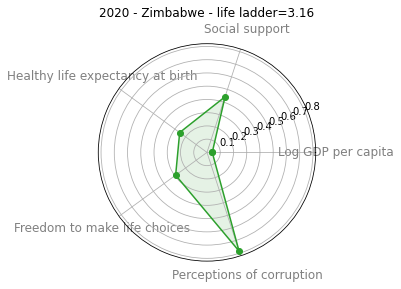

In [392]:
year = 2020
make_polar_plot('Finland',year,  polar_vars, store=True)
make_polar_plot('Portugal',year,  polar_vars, store=True)
make_polar_plot('Zimbabwe',year,  polar_vars, store=True)

### evolution of life ladder for 3 countires Portugal + (best, worst of 2020)

In [340]:
df['Life Ladder'].median(), df[df['Country name'] == 'Portugal']['Life Ladder'].median()

(5.3860249519348145, 5.405246257781982)

Since Portuagl has a Life Ladder median very close to the overall Life Ladder median, we'll use Portugal has the "middle" country.

In [424]:
def evolution_plot(col, data):
    countries = ['Portugal']
    countries.append(last_countries['best'])
    countries.append(last_countries['worst'])

    median = data[data.year>2005].groupby('year')[col].median()

    fig, ax=plt.subplots()
    #countries = ['Finland', 'Portugal', 'Zimbabwe']
    for c in countries:
        data_filter = data[data['Country name'] == c]
        data_filter.plot(x='year', y=col,
                  ax=ax, figsize=(8,6), grid=True, marker='o')
    ax.plot(median, marker='o')
    ax.legend(countries+['median'], )
    plt.title(col)
    plt.savefig(os.path.join('outputs', f'evolution_{col}.png'))

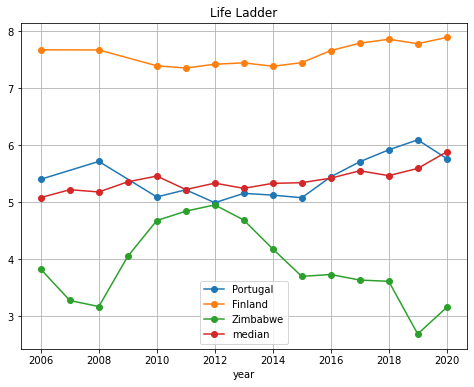

In [425]:
evolution_plot('Life Ladder', df)

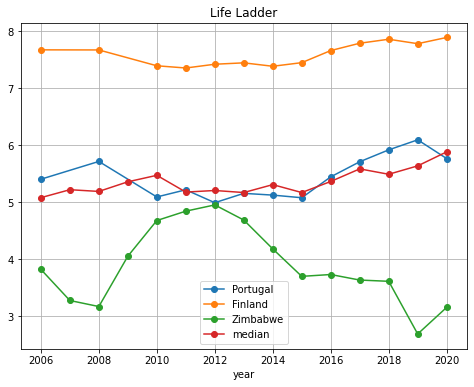

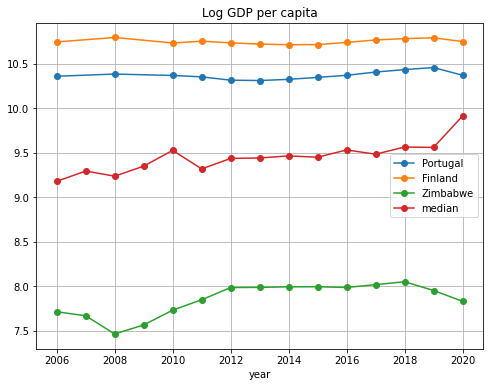

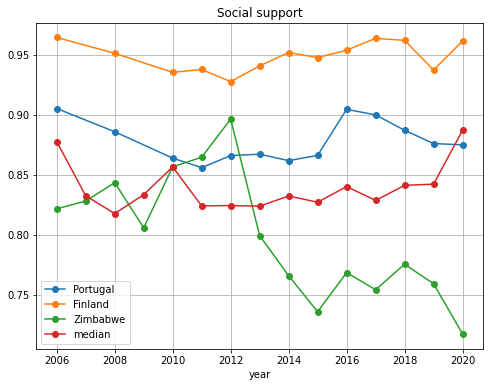

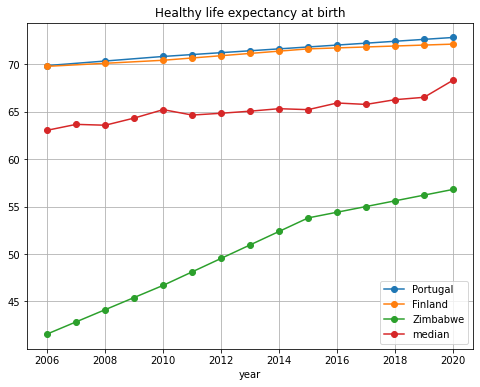

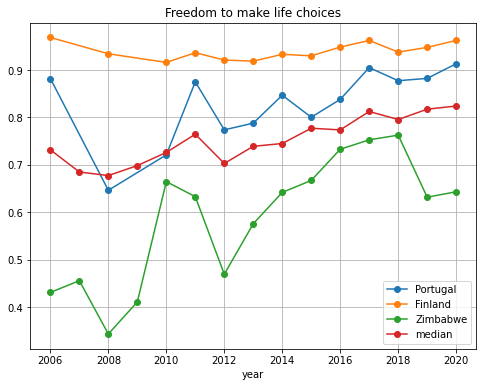

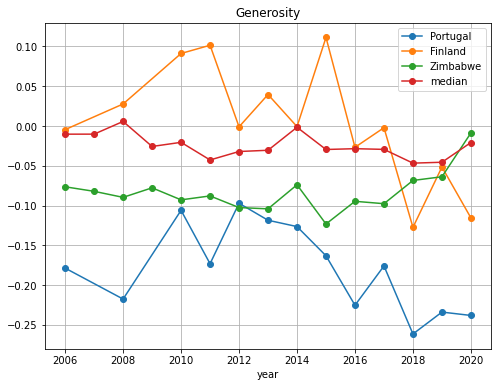

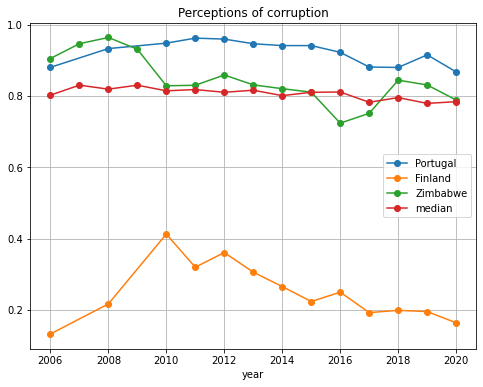

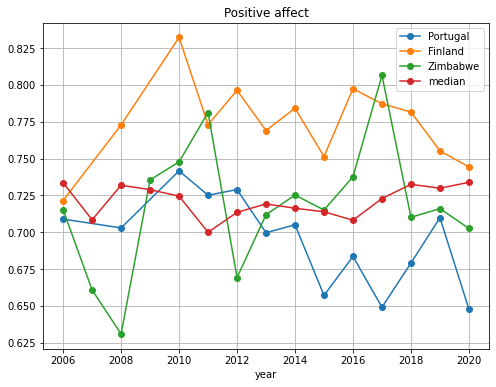

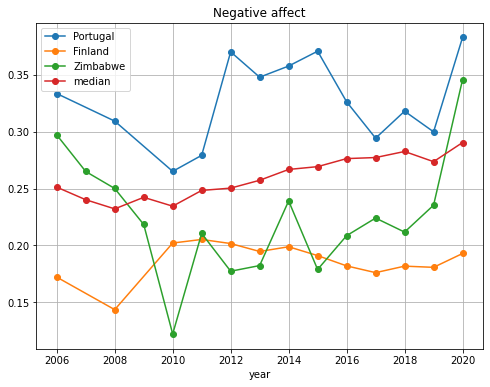

In [427]:
for c in df.columns:
    if c in ['Country name', 'year', 'missing']:  # ignore these variables
        continue
    evolution_plot(c, df2)

In [ ]:
def evolution_plot_2(col):
    countries = ['Portugal']
    countries.append(last_countries['best'])
    countries.append(last_countries['worst'])

    median = df2[df2.year>2005].groupby('year')[col].median()

    fig, ax=plt.subplots()
    #countries = ['Finland', 'Portugal', 'Zimbabwe']
    for c in countries:
        data = df[df['Country name'] == c]
        data.plot(x='year', y=col,
                  ax=ax, figsize=(8,6), grid=True)
    ax.plot(median)
    ax.legend(countries+['median'], )
    plt.title(col)
    plt.savefig(os.path.join('outputs', f'{col}_evolution.png'))

# gravar box plots de todas as variáveis em todos os anos em ficheiros

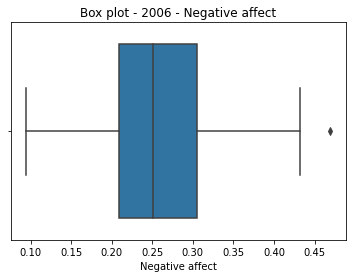

In [73]:
for col in df2.columns:
    if col in ('Country name', 'year'):
        continue
    for year in df2.year.unique():
        if year == 2005:
            continue
        plt.clf()
        sns.boxplot(x=df2[df2.year==year][col])
        plt.title(f'Box plot - {year} - {col}')
        plt.savefig(os.path.join('outputs', f'box_plot_{year}_{col}.png'))

# gravar histogramas de todas as variáveis em todos os anos em ficheiros

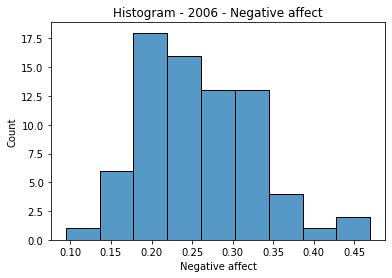

In [86]:
for col in df2.columns:
    if col in ('Country name', 'year'):
        continue
    for year in df2.year.unique():
        if year == 2005:
            continue
        plt.clf()
        sns.histplot(df2[df2.year==year][col])
        plt.title(f'Histogram - {year} - {col}')
        plt.savefig(os.path.join('outputs', f'hist_{year}_{col}.png'))


# Who are the outliers?

In [95]:
select_contries = ['France', 'Germany']
mask = 
for c in select_contries:
    

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [94]:
for year in sorted(df2.year.unique()):
    if year in [2005]:
        continue
    Q1 = df2[df2.year==year]['Life Ladder'].quantile(0.25)
    Q3 = df2[df2.year==year]['Life Ladder'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    higher = Q3 + (1.5 * IQR)
    print(year)
    print('\t', 'Q1', Q1, 'Q3', Q3, 'IQR', IQR)
    print('\tlow end:', list(df2[(df2.year==year) & (df2['Life Ladder'] < lower)]['Country name']))
    print('\thigh end:', list(df2[(df2.year==year) & (df2['Life Ladder'] > higher)]['Country name']))

2006
	 Q1 4.428054094314575 Q3 5.997398376464844 IQR 1.5693442821502686
	low end: []
	high end: []
2007
	 Q1 4.670225501060486 Q3 6.053075313568115 IQR 1.3828498125076294
	low end: []
	high end: []
2008
	 Q1 4.589844703674316 Q3 6.414494514465332 IQR 1.8246498107910156
	low end: []
	high end: []
2009
	 Q1 4.626216888427734 Q3 6.253353714942932 IQR 1.6271368265151978
	low end: []
	high end: []
2010
	 Q1 4.577706933021545 Q3 6.391937971115112 IQR 1.814231038093567
	low end: []
	high end: []
2011
	 Q1 4.615110993385315 Q3 6.108513236045837 IQR 1.4934022426605225
	low end: []
	high end: []
2012
	 Q1 4.4965715408325195 Q3 6.269286632537842 IQR 1.7727150917053223
	low end: []
	high end: []
2013
	 Q1 4.412015080451965 Q3 6.1544471979141235 IQR 1.7424321174621582
	low end: []
	high end: []
2014
	 Q1 4.431409597396851 Q3 6.362027883529663 IQR 1.9306182861328125
	low end: []
	high end: []
2015
	 Q1 4.577626705169678 Q3 6.2792041301727295 IQR 1.7015774250030518
	low end: []
	high end: []
2016
	 Q

In [ ]:
df2[df2['Country name'] == 'Zimbabwe']

# World map

In [5]:
import geopandas

In [6]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

### Verificar se os nomes dos paises do dataset original coincidem com os paises do geopandas

In [32]:
not_found = []
found = []
map_countries = list(world['name'])
for c in list(df['Country name'].unique()):
    if c not in map_countries:
        not_found.append(c)
    else:
        found.append(c)

In [74]:
query = 'Mauritius'
for c in world['name']:
    if query.lower() in c.lower():
        print(c)

In [138]:
original_2_world = {
    'United States': 'United States of America',
    'Czech Republic': 'Czechia',
    'Taiwan Province of China': 'Taiwan',
    # 'Bahrain': '',
    # 'Malta': '',
    # 'Mauritius': '',
     'Bosnia and Herzegovina': 'Bosnia and Herz.',
    # 'Hong Kong S.A.R. of China': '',
    # 'Ivory Coast': '',
    'Dominican Republic': 'Dominican Rep.',
    'North Macedonia': 'Macedonia',
    # 'Singapore': '',
    'North Cyprus': 'N. Cyprus',
    'Congo (Brazzaville)': 'Congo',
    # 'Comoros': '',
     'Palestinian Territories': 'Palestine',
    # 'Swaziland': '',
    # 'Maldives': '',
    'Congo (Kinshasa)': 'Dem. Rep. Congo',
    'Central African Republic': 'Central African Rep.',
    'South Sudan': 'S. Sudan',
    'Somaliland region': 'Somaliland',   
}

world_2_original = {v:k for k,v in original_2_world.items()}

len(original_2_world), len(world_2_original)

(13, 13)

In [226]:
print(f'{len(found)} paises têm o mesmo nome nos dois datasets\n'
      f'{len(not_found)} paises não têm o mesmo nome nos dois datasets\n'
      f'   destes {len(original_2_world)} foram encontrados manualmente e os restantes não têm correspondência\n'
      f'   ou seja, no total temos {len(not_found) - len(original_2_world)} que não são visualizados nos mapas.\n'
     )

144 paises têm o mesmo nome nos dois datasets
22 paises não têm o mesmo nome nos dois datasets
   destes 13 foram encontrados manualmente e os restantes não têm correspondência
   ou seja, no total temos 9 que não são visualizados nos mapas.



### injectar as geometrias do mundo no dataset original

In [227]:
df = pd.read_excel("data/DataPanelWHR2021C2.xlsx")
geometries = []
life_ladder = []
for c in df['Country name']:
    new_geometry = None
    new_ll = None
    if c in found:
        country_idx = df[df['Country name']==c].index
        new_geometry = world[world.name == c].geometry.values[0]
    elif c in not_found_map:
        new_c = not_found_map[c]
        new_geometry = world[world.name == new_c].geometry.values[0]
    geometries.append(new_geometry)

df['geometry'] = geometries

/home/diogoaos/Documents/iseg/iaiml/venv/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


In [241]:
def world_plot(year, column, store=False):
    """ function to plot the world with the data of column named `column` in year `year`"""
    plt.clf()
    df_filter = df[(df.year==year) & (df[column].notnull()) & (df['geometry'].notnull())]
    world_filter = geopandas.GeoDataFrame(df_filter, geometry='geometry')
    
    artist = world_filter.plot(column=column, figsize=(16,8),
                      legend=True, legend_kwds={'shrink': 0.65},
                      cmap=sns.cm.rocket_r
                     )
    plt.title(f'{column} - {year}')
    if store:
        plt.savefig(os.path.join('outputs', f'world__{year}_{column}.png'))
    return artist

<AxesSubplot:title={'center':'Life Ladder - 2020'}>

<Figure size 432x288 with 0 Axes>

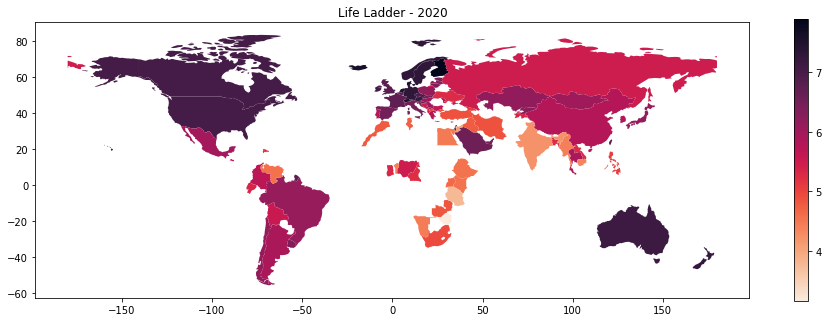

In [246]:
world_plot(2020,'Life Ladder')

### plot all combinations (year, variable) and save to file

2020.0 Life Ladder
2020.0 Log GDP per capita
2020.0 Social support
2020.0 Healthy life expectancy at birth
2020.0 Freedom to make life choices
2020.0 Generosity
2020.0 Perceptions of corruption
2020.0 Positive affect
2020.0 Negative affect
2019.0 Life Ladder


/home/diogoaos/Documents/iseg/iaiml/venv/lib/python3.8/site-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2019.0 Log GDP per capita
2019.0 Social support
2019.0 Healthy life expectancy at birth
2019.0 Freedom to make life choices
2019.0 Generosity
2019.0 Perceptions of corruption
2019.0 Positive affect
2019.0 Negative affect
2018.0 Life Ladder
2018.0 Log GDP per capita
2018.0 Social support
2018.0 Healthy life expectancy at birth
2018.0 Freedom to make life choices
2018.0 Generosity
2018.0 Perceptions of corruption
2018.0 Positive affect
2018.0 Negative affect
2017.0 Life Ladder
2017.0 Log GDP per capita
2017.0 Social support
2017.0 Healthy life expectancy at birth
2017.0 Freedom to make life choices
2017.0 Generosity
2017.0 Perceptions of corruption
2017.0 Positive affect
2017.0 Negative affect
2016.0 Life Ladder
2016.0 Log GDP per capita
2016.0 Social support
2016.0 Healthy life expectancy at birth
2016.0 Freedom to make life choices
2016.0 Generosity
2016.0 Perceptions of corruption
2016.0 Positive affect
2016.0 Negative affect
2015.0 Life Ladder
2015.0 Log GDP per capita
2015.0 Social 

<Figure size 432x288 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

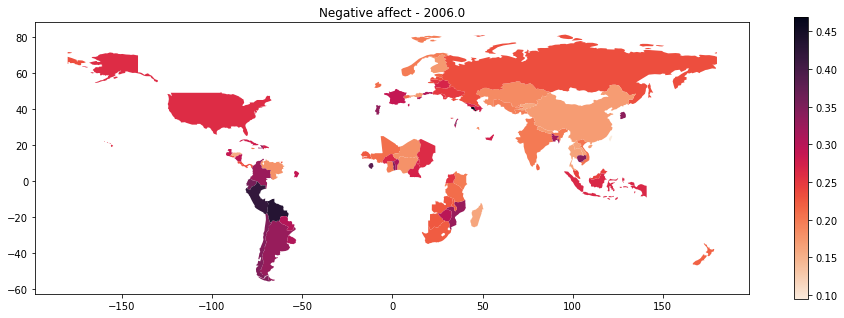

In [232]:
for year in df.year.unique():
    if year in [2005]:
        continue
    for col in list(df.columns):
        if col in ['Country name', 'year', 'geometry']:
            continue
        print(year, col)
        world_plot(year, col, store=True)

### world map animation - NOT OPERATIONAL

https://linuxtut.com/en/c089c549df4d4a6d815c/

In [235]:
column = 'Life Ladder'
years = range(2006,2021)

In [238]:
from matplotlib.animation import FuncAnimation
from IPython import display

/tmp/ipykernel_20194/3970220666.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


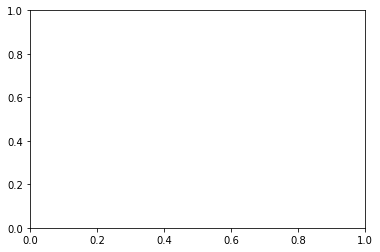

In [245]:
fig, ax = plt.subplots()
ims = []

def update_fig(year):
    if len(ims) > 0:
        ims[0].remove()
        del ims[0]
    artist = world_plot(year, column)
    ims.append(artist)
    return ims
anim = FuncAnimation(fig, update_fig, interval=1000, repeat_delay=3000, frames=years)
fig.show()

In [ ]:
print("making video to file")
anim.save(os.path.join('outputs', f'world_{column}.mp4'), dpi=50)
print("making video to html display")
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)